#Objective of this task : To identify benchmark stores that allow us to test the impact of the trial store layouts on customer sales.

In [259]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [260]:
retail_df = pd.read_csv(r"E:\My Python codes\QVI_data.csv")
retail_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget


In [261]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [262]:
retail_df.loc[:,'DATE'] = pd.to_datetime(retail_df.loc[:,'DATE'], format= '%Y/%m/%d')

retail_df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [263]:
retail_df['MONTH_ID']=pd.PeriodIndex(retail_df['DATE'], freq='M')
retail_df

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


In [264]:
#total sales in each store as "TOT_SALES"
df_sales = retail_df.groupby(['STORE_NBR','MONTH_ID'], sort=False)['TOT_SALES'].sum().to_frame()

df_sales

TOT_SALES
STORE_NBR MONTH_ID           
1         2018-10      188.10
          2018-09      278.80
          2019-03      192.90
          2018-11      192.60
          2018-12      189.60
...                       ...
272       2019-01      423.00
          2018-09      304.70
          2018-10      430.60
          2019-05      314.60
          2018-08      372.85

[3169 rows x 1 columns]

In [265]:
#Total customers in each store as "TOT_CS"
df_cxs = retail_df.groupby(["STORE_NBR", "MONTH_ID"], sort=False)["LYLTY_CARD_NBR"].count().to_frame()
df_cxs

LYLTY_CARD_NBR
STORE_NBR MONTH_ID                
1         2018-10               45
          2018-09               62
          2019-03               49
          2018-11               47
          2018-12               47
...                            ...
272       2019-01               50
          2018-09               36
          2018-10               51
          2019-05               40
          2018-08               48

[3169 rows x 1 columns]

In [266]:
# avg no. of transactions per customer as "AVG_TXN_CS"
txn_cx = retail_df.groupby(["STORE_NBR", "MONTH_ID", "LYLTY_CARD_NBR"], as_index=False)["TXN_ID"].count()
df_txns = txn_cx.groupby(['STORE_NBR','MONTH_ID']).TXN_ID.mean().to_frame()
df_txns

TXN_ID
STORE_NBR MONTH_ID          
1         2018-07   1.061224
          2018-08   1.023810
          2018-09   1.050847
          2018-10   1.022727
          2018-11   1.021739
...                      ...
272       2019-02   1.066667
          2019-03   1.060000
          2019-04   1.037037
          2019-05   1.176471
          2019-06   1.088235

[3169 rows x 1 columns]

In [267]:
#avg no. of chips bought per customer in each store as "AVG_QTY_CS"
qty_cx = retail_df.groupby(["STORE_NBR", "MONTH_ID","LYLTY_CARD_NBR"], as_index=False)["PROD_QTY"].sum()
df_qty = qty_cx.groupby(['STORE_NBR','MONTH_ID']).PROD_QTY.mean().to_frame().rename(columns={"PROD_QTY": "AVG_QTY_CS"})
df_qty

AVG_QTY_CS
STORE_NBR MONTH_ID            
1         2018-07     1.265306
          2018-08     1.285714
          2018-09     1.271186
          2018-10     1.318182
          2018-11     1.239130
...                        ...
272       2019-02     2.022222
          2019-03     2.020000
          2019-04     1.944444
          2019-05     2.088235
          2019-06     2.058824

[3169 rows x 1 columns]

In [268]:
#Avg no. of chips per transaction as "AVG_QTY_TXN"
qty_txn = retail_df.groupby(["STORE_NBR","MONTH_ID","TXN_ID"], as_index=False)["PROD_QTY"].sum()
df_qty_txn = qty_txn.groupby(['STORE_NBR','MONTH_ID']).PROD_QTY.mean().to_frame().rename(columns={"PROD_QTY": "AVG_QTY_TXN"}) 
df_qty_txn

AVG_QTY_TXN
STORE_NBR MONTH_ID             
1         2018-07      1.192308
          2018-08      1.255814
          2018-09      1.209677
          2018-10      1.288889
          2018-11      1.212766
...                         ...
272       2019-02      1.895833
          2019-03      1.905660
          2019-04      1.909091
          2019-05      1.775000
          2019-06      1.891892

[3169 rows x 1 columns]

In [269]:
#Merge all dfs
df_all = pd.concat([df_cxs,df_txns,df_qty,df_qty_txn,df_sales], axis = 1)
df_stores = df_all.rename(columns={"LYLTY_CARD_NBR": "TOT_CS", "TXN_ID": "AVG_TXN_CS"})
df_stores

TOT_CS  AVG_TXN_CS  AVG_QTY_CS  AVG_QTY_TXN  TOT_SALES
STORE_NBR MONTH_ID                                                        
1         2018-07       52    1.061224    1.265306     1.192308      206.9
          2018-08       43    1.023810    1.285714     1.255814      176.1
          2018-09       62    1.050847    1.271186     1.209677      278.8
          2018-10       45    1.022727    1.318182     1.288889      188.1
          2018-11       47    1.021739    1.239130     1.212766      192.6
...                    ...         ...         ...          ...        ...
272       2019-02       48    1.066667    2.022222     1.895833      395.5
          2019-03       53    1.060000    2.020000     1.905660      442.3
          2019-04       56    1.037037    1.944444     1.909091      445.1
          2019-05       40    1.176471    2.088235     1.775000      314.6
          2019-06       37    1.088235    2.058824     1.891892      312.1

[3169 rows x 5 columns]

In [270]:
df_stores.info()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3169 entries, (1, Period('2018-07', 'M')) to (272, Period('2019-06', 'M'))
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TOT_CS       3169 non-null   int64  
 1   AVG_TXN_CS   3169 non-null   float64
 2   AVG_QTY_CS   3169 non-null   float64
 3   AVG_QTY_TXN  3169 non-null   float64
 4   TOT_SALES    3169 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 135.4 KB


In [271]:
#calculate the number monthly observations in each store(some stores) may not have all 12 observations
obs = df_stores.reset_index('MONTH_ID', drop=False).groupby('STORE_NBR').count()
obs

,MONTH_ID,TOT_CS,AVG_TXN_CS,AVG_QTY_CS,AVG_QTY_TXN,TOT_SALES
STORE_NBR,,,,,,
1,12,12,12,12,12,12
2,12,12,12,12,12,12
3,12,12,12,12,12,12
4,12,12,12,12,12,12
5,12,12,12,12,12,12
...,...,...,...,...,...,...
268,12,12,12,12,12,12
269,12,12,12,12,12,12
270,12,12,12,12,12,12


In [272]:
obs['MONTH_ID'].nunique()

5

In [273]:
#Filter through the df to find entries with less than 12 observations
few_obs = obs.loc[(obs['MONTH_ID']!=12)]
few_obs

,MONTH_ID,TOT_CS,AVG_TXN_CS,AVG_QTY_CS,AVG_QTY_TXN,TOT_SALES
STORE_NBR,,,,,,
11,2,2,2,2,2,2
31,2,2,2,2,2,2
44,11,11,11,11,11,11
76,1,1,1,1,1,1
85,1,1,1,1,1,1
92,1,1,1,1,1,1
117,11,11,11,11,11,11
193,3,3,3,3,3,3
206,2,2,2,2,2,2


In [274]:
#Remove instances after the pre-trial period (dates after 2019-02)
df_stores1 = df_stores.sort_index(level=['STORE_NBR','MONTH_ID'], ascending=[1, 1]).loc[pd.IndexSlice[:, '2018-07':'2019-02'], :]
df_stores1

TOT_CS  AVG_TXN_CS  AVG_QTY_CS  AVG_QTY_TXN  TOT_SALES
STORE_NBR MONTH_ID                                                        
1         2018-07       52    1.061224    1.265306     1.192308      206.9
          2018-08       43    1.023810    1.285714     1.255814      176.1
          2018-09       62    1.050847    1.271186     1.209677      278.8
          2018-10       45    1.022727    1.318182     1.288889      188.1
          2018-11       47    1.021739    1.239130     1.212766      192.6
...                    ...         ...         ...          ...        ...
272       2018-10       51    1.159091    2.250000     1.980000      430.6
          2018-11       45    1.097561    2.121951     1.933333      376.2
          2018-12       47    1.000000    1.893617     1.893617      403.9
          2019-01       50    1.086957    2.086957     1.920000      423.0
          2019-02       48    1.066667    2.022222     1.895833      395.5

[2112 rows x 5 columns]

In [275]:
#Filter through to get the trial stores
trial_stores = (df_stores1[df_stores1.index.isin([77, 86, 88], level='STORE_NBR')])
trial_stores

TOT_CS  AVG_TXN_CS  AVG_QTY_CS  AVG_QTY_TXN  TOT_SALES
STORE_NBR MONTH_ID                                                        
77        2018-07       55    1.078431    1.647059     1.527273     296.80
          2018-08       48    1.021277    1.574468     1.541667     255.50
          2018-09       44    1.047619    1.666667     1.590909     225.20
          2018-10       38    1.027027    1.405405     1.368421     204.50
          2018-11       44    1.073171    1.634146     1.522727     245.30
          2018-12       49    1.065217    1.565217     1.500000     267.30
          2019-01       39    1.114286    1.857143     1.666667     204.40
          2019-02       45    1.000000    1.644444     1.644444     235.00
86        2018-07      126    1.272727    2.535354     1.992063     892.20
          2018-08      112    1.191489    2.287234     1.954545     764.05
          2018-09      129    1.252427    2.504854     2.015625     914.60
          2018-10      138    1.266055    2.532110     2.000000     948.40
          2018-11      127    1.270000    2.540000     2.032000     918.00
          2018-12      120    1.224490    2.448980     2.000000     841.20
          2019-01      130    1.382979    2.765957     2.015504     841.40
          2019-02      139    1.299065    2.588785     2.007246     913.20
88        2018-07      153    1.186047    2.372093     2.000000    1310.00
          2018-08      160    1.221374    2.312977     1.917722    1323.80
          2018-09      159    1.282258    2.564516     2.025478    1423.00
          2018-10      158    1.284553    2.569106     2.038710    1352.40
          2018-11      157    1.207692    2.415385     2.012821    1382.80
          2018-12      149    1.182540    2.365079     2.013514    1325.20
          2019-01      146    1.247863    2.495726     2.027778    1266.40
          2019-02      154    1.241935    2.483871     2.013072    1370.20

In [276]:
few_obs.index.tolist()

[11, 31, 44, 76, 85, 92, 117, 193, 206, 211, 218, 252]

In [277]:
# Remove all the stores with less than 12 observations and the trial stores to get the list of potential control stores
other_stores = df_stores1.drop(index = [11,31,44,76,85,92,117,193,206,211,218,252], level='STORE_NBR')
other_stores

TOT_CS  AVG_TXN_CS  AVG_QTY_CS  AVG_QTY_TXN  TOT_SALES
STORE_NBR MONTH_ID                                                        
1         2018-07       52    1.061224    1.265306     1.192308      206.9
          2018-08       43    1.023810    1.285714     1.255814      176.1
          2018-09       62    1.050847    1.271186     1.209677      278.8
          2018-10       45    1.022727    1.318182     1.288889      188.1
          2018-11       47    1.021739    1.239130     1.212766      192.6
...                    ...         ...         ...          ...        ...
272       2018-10       51    1.159091    2.250000     1.980000      430.6
          2018-11       45    1.097561    2.121951     1.933333      376.2
          2018-12       47    1.000000    1.893617     1.893617      403.9
          2019-01       50    1.086957    2.086957     1.920000      423.0
          2019-02       48    1.066667    2.022222     1.895833      395.5

[2080 rows x 5 columns]

In [278]:
stores = other_stores.reset_index(level=['MONTH_ID'],drop=True)
stores

,TOT_CS,AVG_TXN_CS,AVG_QTY_CS,AVG_QTY_TXN,TOT_SALES
STORE_NBR,,,,,
1,52,1.061224,1.265306,1.192308,206.9
1,43,1.023810,1.285714,1.255814,176.1
1,62,1.050847,1.271186,1.209677,278.8
1,45,1.022727,1.318182,1.288889,188.1
1,47,1.021739,1.239130,1.212766,192.6
...,...,...,...,...,...
272,51,1.159091,2.250000,1.980000,430.6
272,45,1.097561,2.121951,1.933333,376.2
272,47,1.000000,1.893617,1.893617,403.9


In [279]:
tot_metrics = stores.groupby("STORE_NBR")['TOT_CS','TOT_SALES'].sum()
tot_metrics

<ipython-input-279-6f9ece453efa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  tot_metrics = stores.groupby("STORE_NBR")['TOT_CS','TOT_SALES'].sum()


,TOT_CS,TOT_SALES
STORE_NBR,,
1,387,1612.30
2,319,1267.90
3,1017,8723.85
4,1146,10010.40
5,924,6466.70
...,...,...
268,357,1714.05
269,1089,7619.70
270,1100,7566.35


In [280]:
avg_metrics = stores.groupby("STORE_NBR")['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'].mean()
avg_metrics

<ipython-input-280-e8aaaad32948>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_metrics = stores.groupby("STORE_NBR")['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'].mean()


,AVG_TXN_CS,AVG_QTY_CS,AVG_QTY_TXN
STORE_NBR,,,
1,1.048207,1.273333,1.215088
2,1.061465,1.189082,1.122733
3,1.181812,2.302009,1.962888
4,1.216111,2.417142,2.005229
5,1.252646,2.491116,1.989860
...,...,...,...
268,1.050102,1.434108,1.363562
269,1.282527,2.547853,2.001034
270,1.330497,2.641526,2.016373


In [281]:
store_metrics = pd.concat([tot_metrics,avg_metrics], axis = 1).drop(['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'], axis = 1).sort_values(by ='TOT_SALES',ascending=False)
store_metrics

,TOT_CS,TOT_SALES
STORE_NBR,,
226,1325,11492.15
237,1230,10773.80
88,1236,10753.80
165,1188,10475.30
58,1189,10360.75
...,...,...
42,43,181.10
198,28,167.20
140,40,157.00


In [282]:
my_list=[77,88,86]
trial = store_metrics[store_metrics.index.isin(my_list)].drop(columns=['TOT_CS']).astype('int64').reset_index()
trial

,STORE_NBR,TOT_SALES
0,88,10753
1,86,7033
2,77,1934


In [283]:
trial.mean()

STORE_NBR      83.666667
TOT_SALES    6573.333333
dtype: float64

In [284]:
store_metrics.describe()

,TOT_CS,TOT_SALES
count,260.000000,260.000000
mean,677.426923,4958.072115
std,375.273180,3048.349683
min,28.000000,130.700000
25%,356.000000,2163.650000
50%,840.500000,5964.275000
75%,1023.250000,7425.187500
max,1325.000000,11492.150000


In [285]:
#Finding control stores

I will pick the store whose sales is closer to the mean. 

In [333]:
store_metrics['MAG_SALES'] = store_metrics['TOT_SALES'] - store_metrics['TOT_SALES'].mean() 
store_metrics['MAG_CS'] = store_metrics['TOT_CS'] - store_metrics['TOT_CS'].mean()
store_metrics

,TOT_CS,TOT_SALES,MAG_SALES,MAG_CS
STORE_NBR,,,,
226,1325,11492.15,6534.077885,647.573077
237,1230,10773.80,5815.727885,552.573077
88,1236,10753.80,5795.727885,558.573077
165,1188,10475.30,5517.227885,510.573077
58,1189,10360.75,5402.677885,511.573077
...,...,...,...,...
42,43,181.10,-4776.972115,-634.426923
198,28,167.20,-4790.872115,-649.426923
140,40,157.00,-4801.072115,-637.426923


In [338]:
control_stores = store_metrics.loc[(store_metrics['MAG_SALES'] >= -1000) & (store_metrics['MAG_SALES'] <= 800)].reset_index()
control_stores

,STORE_NBR,TOT_CS,TOT_SALES,MAG_SALES,MAG_CS
0,148,883,5757.6,799.527885,205.573077
1,56,823,5662.5,704.427885,145.573077
2,212,811,5634.4,676.327885,133.573077
3,246,458,4058.4,-899.672115,-219.426923
4,202,452,3982.9,-975.172115,-225.426923


Select the first 3 stores which are closer to the mean total sales

In [339]:
c = control_stores.drop(index = [3,4],columns = ['TOT_CS','MAG_SALES','MAG_CS']).reset_index().drop(columns='index',axis=1)
c


,STORE_NBR,TOT_SALES
0,148,5757.6
1,56,5662.5
2,212,5634.4


In [289]:
#Also group A aka control grp
C=c["TOT_SALES"].astype('int64')
C

0    5757
1    5662
2    5634
Name: TOT_SALES, dtype: int64

In [290]:
#Also grp B aka trial grp
T=trial["TOT_SALES"]
T

0    10753
1     7033
2     1934
Name: TOT_SALES, dtype: int64

In [291]:
AB = pd.concat([C, T], axis = 1)
AB.columns = ["A","B"]
AB

,A,B
0,5757,10753
1,5662,7033
2,5634,1934


In [292]:
print(T.mean())
print(C.mean())
#Trial stores have a generally higher mean in sales than control stores but  but we need to find out if this is statistically significant

6573.333333333333
5684.333333333333


1) Controlling 1st Assumption:
H0: The data is normally distributed
H1: The data is not normally distributed

In [293]:
from scipy.stats import shapiro

In [294]:
shapiro(AB.A)

ShapiroResult(statistic=0.9099966883659363, pvalue=0.4180678427219391)

In [295]:
shapiro(AB.B)

ShapiroResult(statistic=0.9919155240058899, pvalue=0.8280441761016846)

p value of group A is 0.418 which is >0.05 so we accept H0 meaning that group A is normally distributed

p value of group B is 0.828 which is >0.05 so we accept H0 meaning that group B data is normally distributed.

2) Controlling 2nd Assumption:
H0: The variances are equal(homogenous)
H1: The variances are unequal(non-homogenous)

In [296]:
import scipy.stats as stats
stats.levene(AB.A, AB.B)

LeveneResult(statistic=3.622175717186367, pvalue=0.12975886841620393)

p-value is >0.05 so we accept H0 meaning variances are equal

In [297]:
#Determine if there's a statisctical significance in TOTAL SALES of the 2 groups

Hypothesis testing - A/B test
We'll use Independent Two-Sample T-Test for testing the hyphothesis.

H0: There is not statistically significant difference between two groups' total sales
H1: There is significant difference between two groups' total sales

In [298]:
stats.ttest_ind(AB["A"], AB["B"])

Ttest_indResult(statistic=-0.34774779263979405, pvalue=0.7455578439732351)

pvalue>0.05 so we accept H0. There is no statistical significance between the 2 groups total sales

In [299]:
#Determine if there's a statisctical significance in TOTAL CUSTOMERS of the 2 groups

In [300]:
store_metrics = pd.concat([tot_metrics,avg_metrics], axis = 1).drop(['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'], axis = 1).sort_values(by ='TOT_SALES',ascending=False)
store_metrics

,TOT_CS,TOT_SALES
STORE_NBR,,
226,1325,11492.15
237,1230,10773.80
88,1236,10753.80
165,1188,10475.30
58,1189,10360.75
...,...,...
42,43,181.10
198,28,167.20
140,40,157.00


In [301]:
my_list1=[77,88,86]


In [302]:
trial1 = store_metrics[store_metrics.index.isin(my_list1)].drop(columns=['TOT_SALES']).astype('int64').reset_index()
trial1

,STORE_NBR,TOT_CS
0,88,1236
1,86,1021
2,77,362


In [303]:
c1 = control_stores.drop(index = [3,4],columns = ['TOT_SALES','MAG_SALES','MAG_CS'])
c1

,STORE_NBR,TOT_CS
0,148,883
1,56,823
2,212,811


In [304]:
C1=c1["TOT_CS"].astype('int64')
C1

0    883
1    823
2    811
Name: TOT_CS, dtype: int64

In [305]:
T1=trial1["TOT_CS"]
T1

0    1236
1    1021
2     362
Name: TOT_CS, dtype: int64

In [306]:
AB1 = pd.concat([C1, T1], axis = 1)
AB1.columns = ["A","B"]
AB1

,A,B
0,883,1236
1,823,1021
2,811,362


In [307]:
print(T1.mean())
print(C1.mean())

873.0
839.0


Hypothesis testing - A/B test

H0: There is not statistically significant difference between two groups' total customers
H1: There is significant difference between two groups' total customers

In [308]:
stats.ttest_ind(AB1["A"], AB1["B"])

Ttest_indResult(statistic=-0.1288504433344823, pvalue=0.9036949721153367)

pvalue>0.05 so we accept H0. There is no statistical significance between the 2 groups total sales and total customers

#Compare total sales and total customers in trial, control and other stores

In [327]:
plot_others = other_stores.drop(index = [56, 148, 212, 77, 86, 88], level='STORE_NBR').groupby('MONTH_ID').mean().astype('int64').drop(['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'], axis = 1).rename(columns={"TOT_CS": "TOT_CS_OTHERS", "TOT_SALES": "TOT_SALES_OTHERS"})

plot_others

,TOT_CS_OTHERS,TOT_SALES_OTHERS
MONTH_ID,,
2018-07,86,632
2018-08,85,604
2018-09,83,613
2018-10,84,627
2018-11,83,612
2018-12,87,641
2019-01,84,623
2019-02,77,575


In [326]:

plot_control = (df_stores1[df_stores1.index.isin([56, 148, 212], level='STORE_NBR')]).groupby('MONTH_ID').mean().astype('int64').drop(['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'], axis = 1).rename(columns={"TOT_CS": "TOT_CS_CONTROL", "TOT_SALES": "TOT_SALES_CONTROL"})
plot_control

,TOT_CS_CONTROL,TOT_SALES_CONTROL
MONTH_ID,,
2018-07,103,688
2018-08,104,685
2018-09,104,712
2018-10,115,789
2018-11,104,698
2018-12,122,837
2019-01,96,642
2019-02,89,630


In [325]:
#Filter through to get the trial stores
plot_trial = (df_stores1[df_stores1.index.isin([77, 86, 88], level='STORE_NBR')]).groupby('MONTH_ID').mean().astype('int64').drop(['AVG_TXN_CS','AVG_QTY_CS','AVG_QTY_TXN'], axis = 1).rename(columns={"TOT_CS": "TOT_CS_TRIAL", "TOT_SALES": "TOT_SALES_TRIAL"})
plot_trial

,TOT_CS_TRIAL,TOT_SALES_TRIAL
MONTH_ID,,
2018-07,111,833
2018-08,106,781
2018-09,110,854
2018-10,111,835
2018-11,109,848
2018-12,106,811
2019-01,105,770
2019-02,112,839


In [312]:
pd.plotting.register_matplotlib_converters()

Visualise the pre-trial period in all three groups  by TOT_SALES and TOT_CS

Text(0.5, 1.0, 'Total Sales in pre-trial')

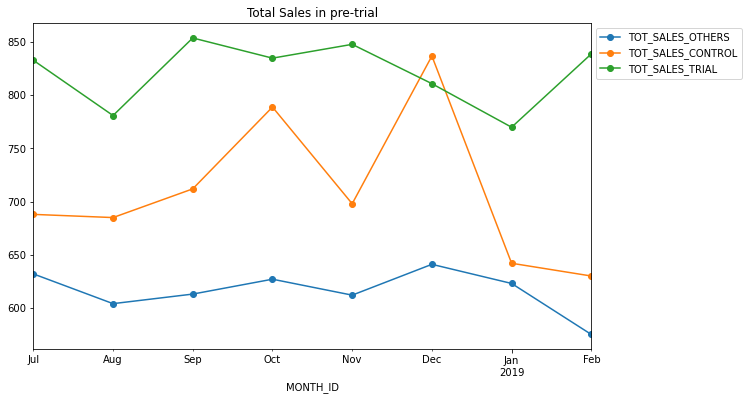

In [328]:
ax = plot_others.plot(y='TOT_SALES_OTHERS',kind='line',figsize = (10, 6),marker='o')

plot_control.plot(y='TOT_SALES_CONTROL',marker='o', ax=ax)
plot_trial.plot(y='TOT_SALES_TRIAL',marker='o', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
ax.set_title('Total Sales in pre-trial')


Text(0.5, 1.0, 'Total customers in pre-trial')

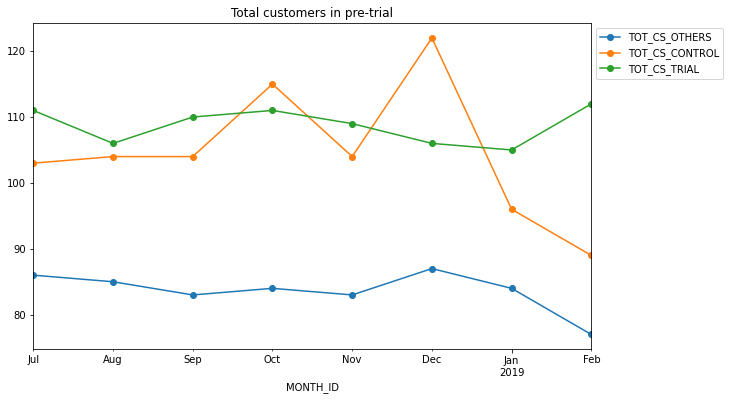

In [329]:
ax = plot_others.plot(y='TOT_CS_OTHERS',kind='line',figsize = (10, 6),marker='o')

plot_control.plot(y='TOT_CS_CONTROL',marker='o', ax=ax)
plot_trial.plot(y='TOT_CS_TRIAL',marker='o', ax=ax)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
ax.set_title('Total customers in pre-trial')


PROJECT ONGOING....